# U.S. Medical Insurance Costs

## 1 Introduction


This project will analyze the cost of medical treatment in the US. The purpose of the analysis is to find the main factors that affect the price of insurance. In addition, it is important to draw conclusions on what aspects of daily life can be improved to reduce insurance costs.

### 1.1 Importing relevant extensions

In [2]:
import pandas as pd
import pprint as pprint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr

## 2. Data Exploration

Database import

In [3]:
db = pd.read_csv('insurance.csv')

Database preview

In [4]:
db.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The database consists of 7 columns and 1338 records. No empty cells were found. The database appears to be well prepared. Since the database was provided for educational purposes, it is cleaned. The database cleaning phase will be skipped.

### 2.1. Descriptive Statistics

Calculatig the following:
- mean
- median
- standard deviation
- quartiles

In [6]:
db.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


We can see that for age, bmi, children and charges we have some NaN cells in which no data is given. In the next section we will check whether the cells containing NaN are located within one or many records.

For the cell with gender and smoking there are two unique values, which suggests that the data in this column is correct. 

The Smoker cell could actually be a binary form, due to the fact that it either smokes - True, or does not - False. 


### 2.2 Visual Analysis

#### 2.2.1. Identifying Data Types

In order to choose the correct methods of data visualization, it is necessary to identify them first

In [7]:
db.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

|Variable  | Type                  |
|----------|-----------------------|
| Age      | Numerical Discrete    |
| Sex      | Categorical Binary    |
| BMI      | Numerical Continuous  |
| Children | Numerical Discrete    |
| Smoker   | Categorical Binary    |
| Region   | Categorical Nominal   |
| Charges  | Numerical Continuous  |


#### 2.3. Single Variable Analysis

##### Age and BMI

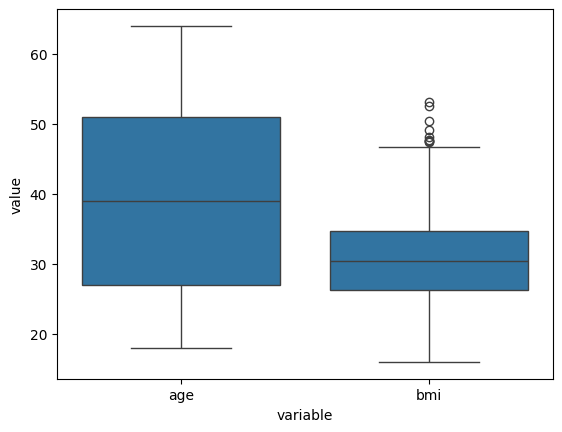

In [8]:
# It is necessary to transform to a "long" format using the pd.melt function so that each line corresponds to a single pomier with a specific variable ('age' or 'bmi') and its value.
df_long = pd.melt(db, value_vars=['age', 'bmi'], var_name='variable', value_name='value')

# Creating a boxplot chart
sns.boxplot(x='variable', y='value', data=df_long)
plt.show()


For the BMI column, there have been several values that could be considered atypical. For the BMI indicator, these cases lie in the group of overly obese people. This is likely.

<Axes: xlabel='age', ylabel='Count'>

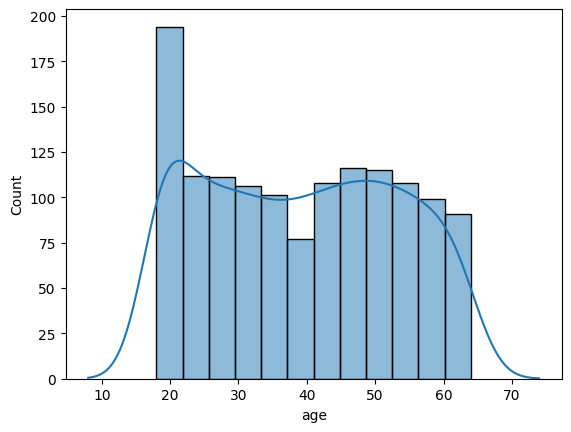

In [9]:
sns.histplot(db['age'], kde=True, kde_kws=dict(cut=3))

The histogram is actually flat and we have about 80-100 people for each age group, except for 20-somethings, who are twice as many. With such a large number of samples, twice as many 20-somethings will not disturb the results.

<Axes: xlabel='bmi', ylabel='Count'>

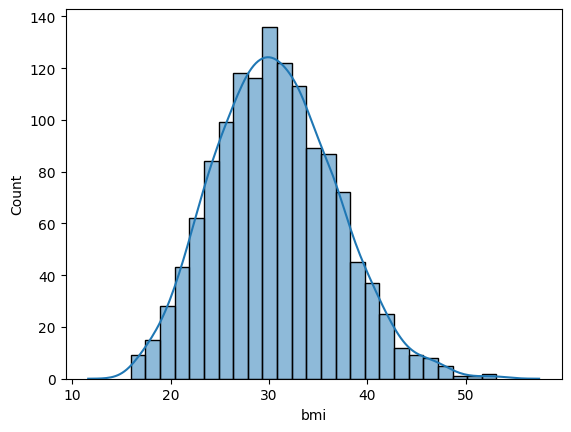

In [10]:
sns.histplot(db['bmi'], kde=True, kde_kws=dict(cut=3))

The BMI histogram is typical and shows an even distribution of people, colloquially speaking thin and overweight

##### Children

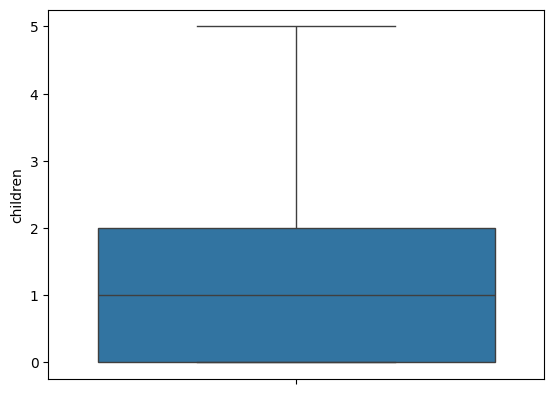

In [11]:
sns.boxplot(data = db, y='children')
plt.show()

<Axes: xlabel='children', ylabel='Count'>

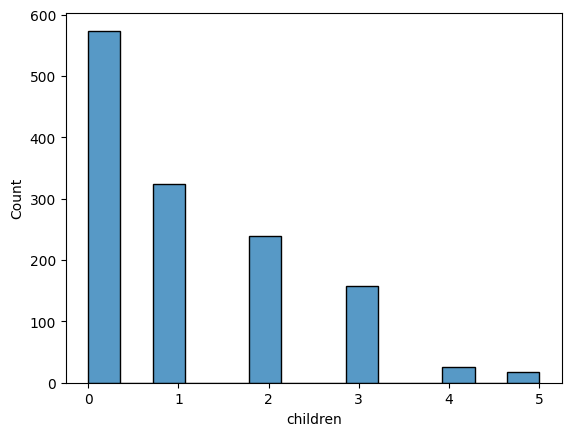

In [12]:
sns.histplot(db['children'])

The histogram of the number of children owned tells us that slightly less than half of the respondents do not have children. about the same number of people have from one to three children. The histogram collapses for those who have four and five children. For analyses taking the effect of the number of children and relating it to this group of people must be carefully verified, as the sample may be too small to make conclusions.

##### Region

In [13]:
list(db.region.unique())

['southwest', 'southeast', 'northwest', 'northeast']

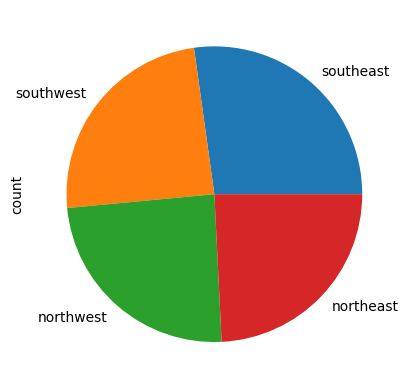

In [14]:
db.region.value_counts().plot.pie()
plt.show()
plt.close()

As we can see, the data is divided into 4 regions approximately in equal quarters. 

##### Charges

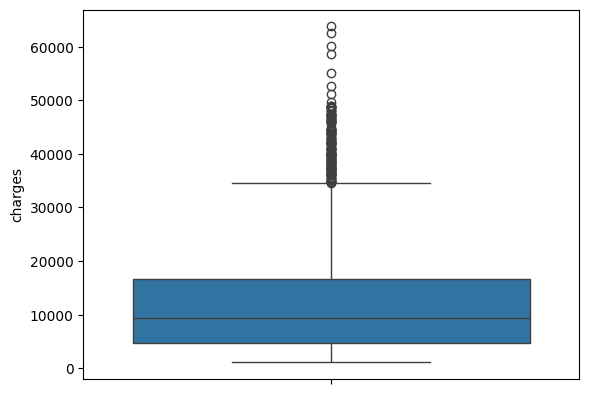

In [15]:
sns.boxplot(data = db, y= 'charges')
plt.show()

This chart shows that a huge number of people have excessively high insurance costs compared to other people. It should be determined what could be the reasons for this, i.e. which factors have the greatest impact on the price of insurance.

<Axes: xlabel='charges', ylabel='Count'>

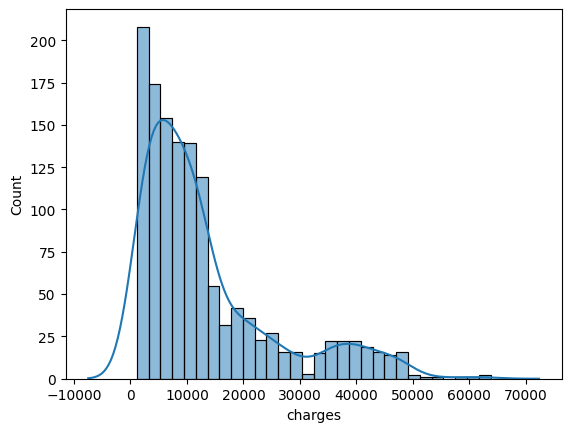

In [16]:
sns.histplot(db['charges'], kde=True, kde_kws=dict(cut=3))

The cost histogram is asymmetric with a strong tendency to the left - lower treatment costs. 

In this diagram, we see two inflection points:
1. at $30,000 where the numbers are very low
2. for costs above $50,000 - people with costs higher than this amount are exceptions.

<Axes: xlabel='charges', ylabel='Count'>

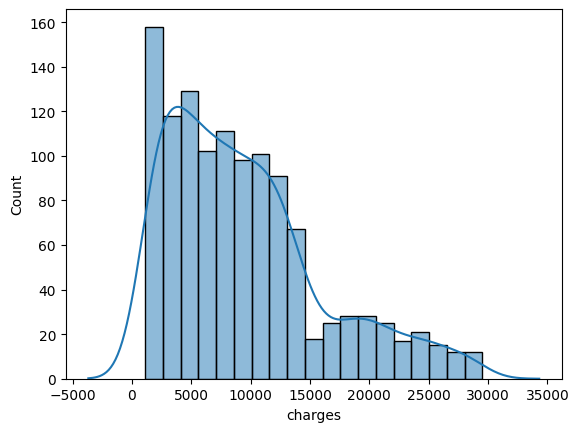

In [17]:
sns.histplot(db[db['charges'] < 30000].charges, kde=True, kde_kws=dict(cut=3))

When limiting the histogram to costs no higher than $30,000, the histogram still has an asymmetric tendency to the left, and reveals another small breakthrough - for the amount of $15,000. The number of people whose insurance costs are higher suddenly drops dramatically.

In conclusion, two points should be considered in further analysis: $15,000 and $30,000, and identify what factors contribute to the overrun of these two points

#### 2.4 Associations between Charges and Variables

Let's examine how the following factors affect the cost of insurance

##### Charges/Age

<Axes: xlabel='age', ylabel='charges'>

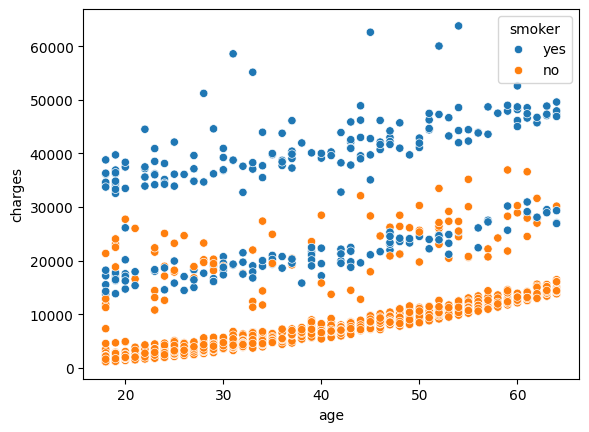

In [18]:
sns.scatterplot(data=db, x='age', y='charges',
                hue = 'smoker')

The above diagram allows us to draw the following conclusions:
1. insurance costs increase with the age of the insured person
2. Another parameter divides the diagram into 3 subgroups, which are represented by splitting the data into 3 parallel lanes. Applying an additional color, which further categorizes the data based on whether the insured is a smoker or not, proves that it was this factor that split the data. Thus, it is possible to put forward a theory that the fact of being a smoker significantly increases the cost of insurance

##### Charges/Sex

<Axes: xlabel='sex', ylabel='charges'>

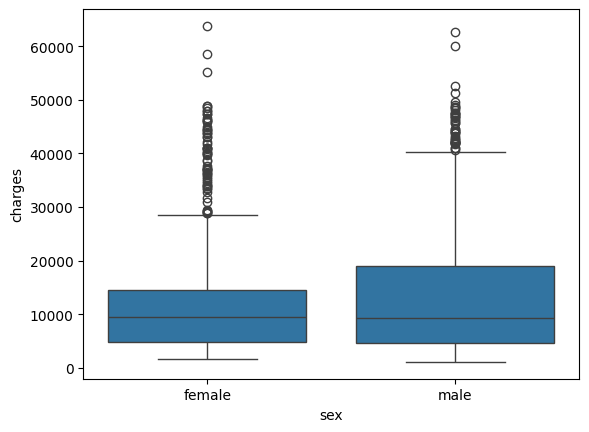

In [19]:
sns.boxplot(data=db, x='sex', y='charges')

Just as intuition suggests - average medical insurance costs have no relation to gender. Yet the data presents a much larger scatter for men than for women. Let's look at the data separately for both genders

<Axes: xlabel='charges', ylabel='Density'>

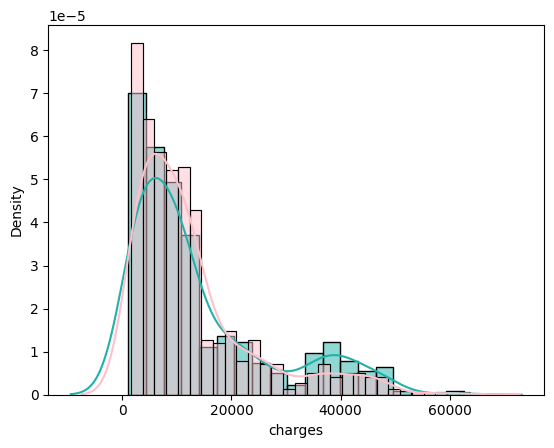

In [20]:
db_male = db[db['sex'] == 'male']
db_female = db[db['sex'] == 'female']

sns.histplot(data=db_male, x='charges', kde=True, kde_kws=dict(cut=3), color='lightseagreen', label='male', stat='density', alpha=0.5)
sns.histplot(data=db_female, x='charges', kde=True, kde_kws=dict(cut=3), color='pink', label='female', stat='density', alpha=0.5)

The histogram shows that the group of men above $30,000 is more numerous than women, and conversely, the number of women below the insurance amount of $15,000 is more numerous than men. Having already had experience with the influence of smokers on the data, let's test the hypothesis that men smoke more often than women

In [21]:
sex_smoker = pd.crosstab(db.sex, db.smoker)
sex_smoker

smoker,no,yes
sex,,
female,547,115
male,517,159


Female are slightly outnumbered by 44 male-smokers.

<Axes: xlabel='charges', ylabel='Density'>

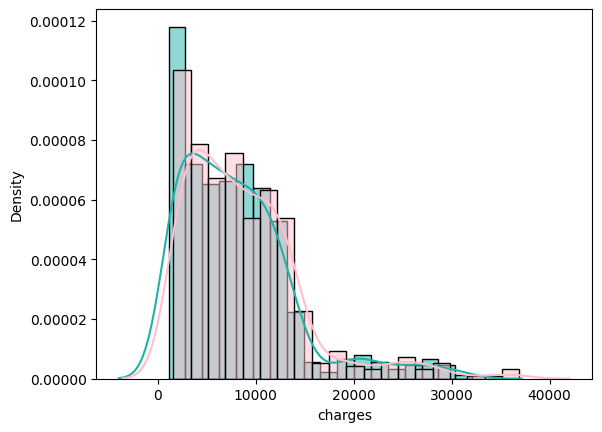

In [22]:
db_male_non_smokers = db[(db.sex == 'male') & (db.smoker == 'no')]
db_female_non_smokers = db[(db.sex == 'female' ) & (db.smoker == 'no')]

sns.histplot(data=db_male_non_smokers, x='charges', kde=True, kde_kws=dict(cut=3), color='lightseagreen', label='male', stat='density', alpha=0.5)
sns.histplot(data=db_female_non_smokers, x='charges', kde=True, kde_kws=dict(cut=3), color='pink', label='female', stat='density', alpha=0.5)

As can be seen in the above diagram, removing the smoking factor, flattened the histories to almost two identical ones. This therefore confirms the thesis that health insurance costs are not gender-specific, and that the differences on the boxplot are due to the effect of smoking on health insurance costs

Charges/BMI

<Axes: xlabel='bmi', ylabel='charges'>

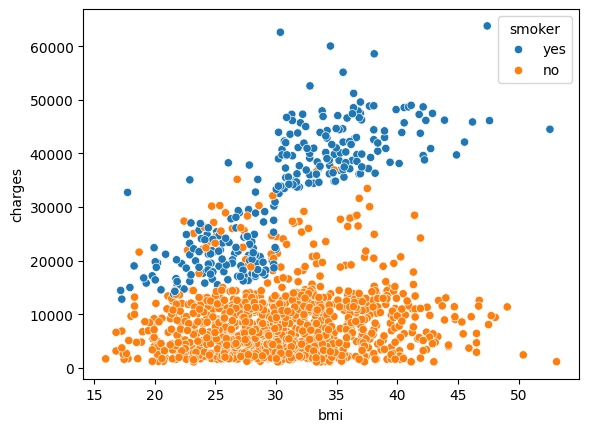

In [23]:
sns.scatterplot(data=db, x='bmi', y='charges', hue= 'smoker')

The diagram splits into a rather dense cloud up to an amount of about $15,000, which already drew our attention earlier. From this amount, a second cloud of points is formed, which has an ascending tendency. Applying to this graph again the categorization of whether a person is a smoker makes it possible to understand why this diagram has split into two clouds. In addition, the first hypothesis can be made, that not being a smoker results in not exceeding the $15,000 insurance cost in most cases

The orange cloud, which applies to non-smokers, is quasi-flat. This means that bmi, for this group, has no impact on insurance costs.

The blue cloud, which applies to smokers, has an upward trend, suggesting that bmi, for this group, has an impact on insurance costs. These increase with increasing BMI, and therefore the degree of overweight

##### Charges/Children

<Axes: xlabel='children', ylabel='charges'>

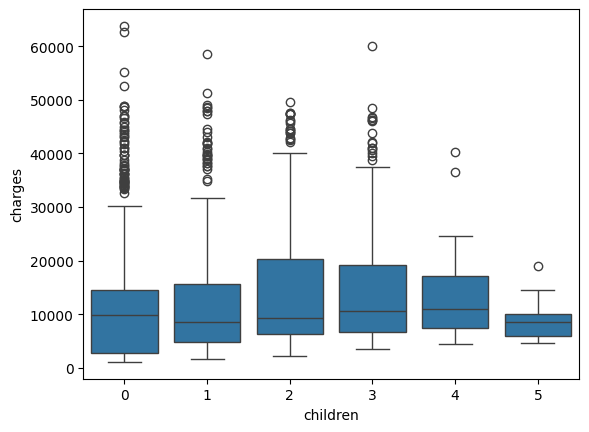

In [24]:
sns.boxplot(data=db, x='children', y='charges')

Przedstawiony obrazek to wykres pudełkowy (boxplot), który pokazuje rozkład wartości "charges" dla różnych grup obserwacji podzielonych na podstawie liczby "children" (dzieci). Oś pionowa (Y) wykresu przedstawia wartości opłat (charges), a oś pozioma (X) – liczbę dzieci.

Na wykresie widzimy sześć osobnych wykresów pudełkowych reprezentujących grupy ludzi od 0 do 5 dzieci. Każde pudełko na wykresie przedstawia:

- Medianę (pozioma linia w środku pudełka),
- Pierwszy kwartyl (Q1, dolna krawędź pudełka) i trzeci kwartyl (Q3, górna krawędź pudełka),
- Wiskery (whiskers), które wychodzą z pudełka i wskazują zakres wartości na 1.5 * IQR (interkwartylowy zakres) od Q1 i Q3,
- Pojedyncze punkty (outliery), które wypadają poza zakres wiskerów.

Analizując wykres:

1. Mamy do czynienia z szerokim zakresem "charges" we wszystkich kategoriach liczby dzieci; jednak wartości median wydają się generalnie wzrastać, ale tylko nieznacznie, z większą liczbą dzieci. Najniższa mediana znajduje się w grupie osób bez dzieci, a najwyższa dla osób z trójką dzieci.

2. W grupach od 0 do 2 dzieci występuje duża liczba wartości odstających (outliers) poza górnym wiskerem, co sugeruje, że w tych grupach są jednostki z wyjątkowo wysokimi opłatami. Ilość outlierów dla grup z większą liczbą dzieci (3 do 5) wydaje się być mniejsza.

3. Rozpiętość międzykwartylowa, czyli różnica między Q3 i Q1 (wysokość "pudełka"), wydaje się w miarę stabilna dla grup z 0 do 3 dzieci, ale staje się znacząco mniejsza dla osób z 4 i 5 dziećmi. To może sugerować mniejszą zmienność w wartościach "charges" dla tych, którzy mają więcej dzieci, jednak może też oznaczać mniejszą liczbę takich danych w formie próbek, co wpływa na szerokość pudełek.

4. Na ogół wartości odstające znajdują się ponad górnymi częściami wiskerów, co wskazuje na to, że długie ogony w rozkładzie wartości "charges" w tych grupach są skierowane w kierunku wyższych opłat.

Wyciągając wnioski z tego histogramu, możemy zauważyć, że mediana i zakres opłat nieznacznie zmieniają się w zależności od liczby dzieci, choć wzorce zmienią się i stają bardziej zauważalne przy większej liczbie dzieci. Ponadto, częstsze występowanie wartości odstających wśród ludzi bez dzieci lub z jednym-dwójką dzieci wskazuje na większe różnice w opłatach w tych grupach. Aby lepiej zrozumieć naturę danych i ich rozkład, przydatne mogłoby być posiadanie dodatkowych informacji kontekstowych oraz analiza większej liczby danych lub analiza pod kątem innych zmiennych, które mogłyby wpłynąć na opłaty.

##### Charges/Smoker

##### Charges/Region

Charges/Age 
Charges/Sex
Chagers/BMI
Charges/Children
Charges/Smoker
Charges/Region



<Axes: >

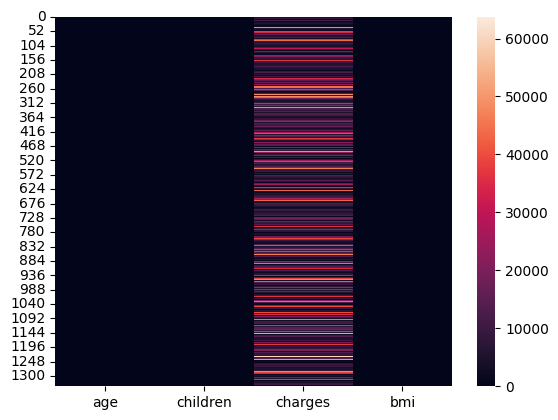

In [32]:
sns.heatmap(data=db[['age','children','charges','bmi']])

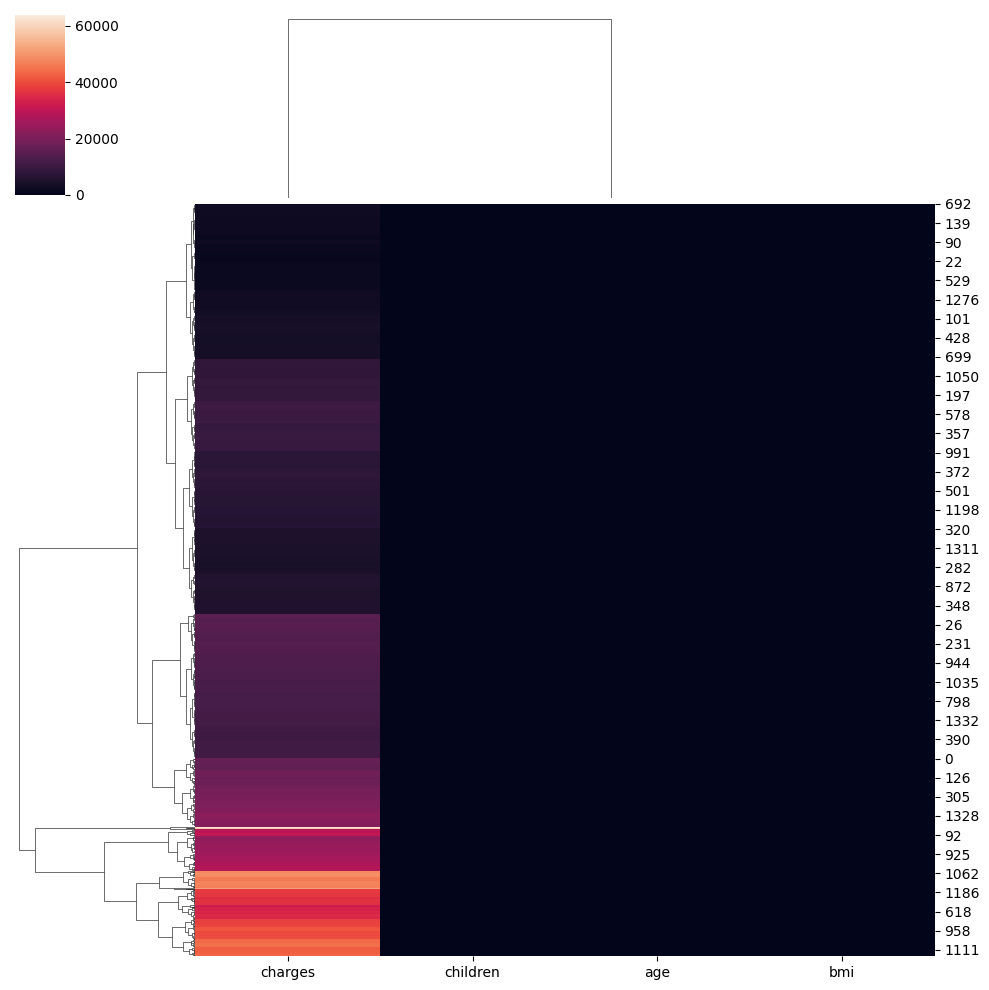

In [28]:
sns.clustermap(data=db[['age','children','charges','bmi']])

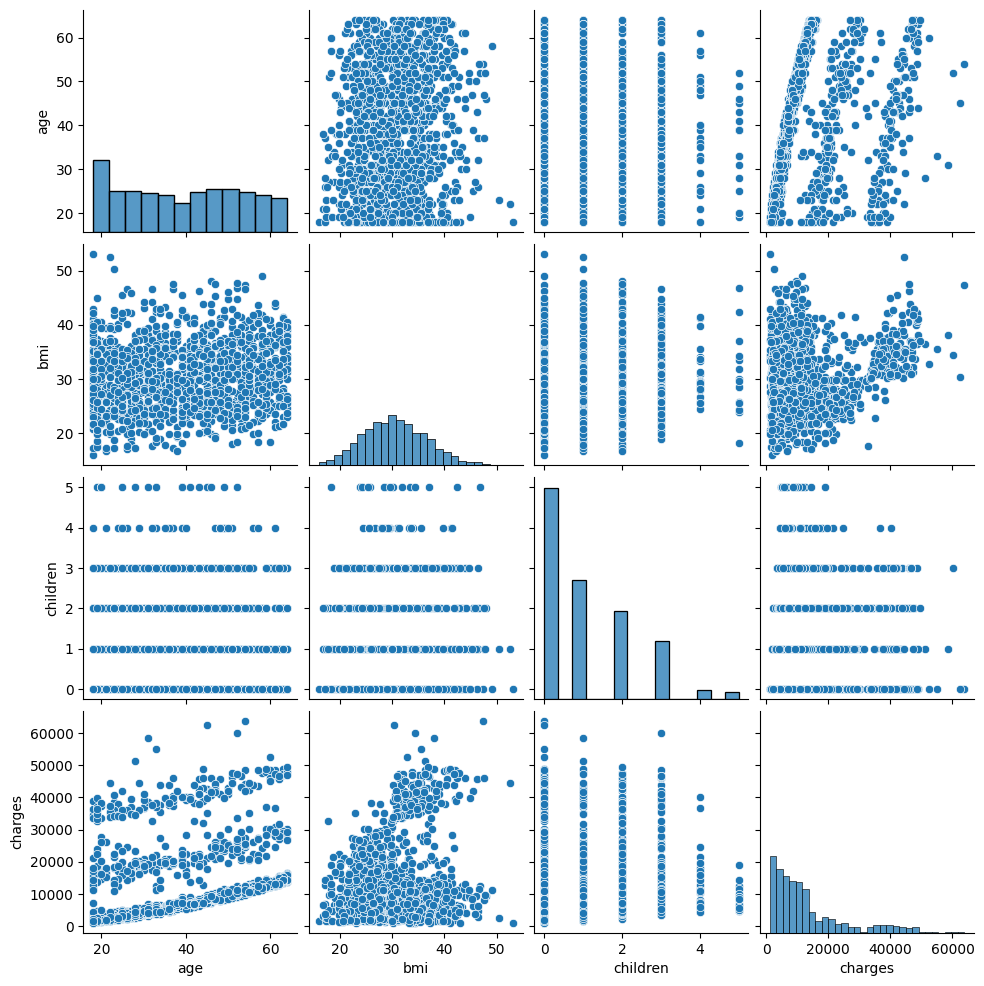

In [25]:
sns.pairplot(data=db)

### -------------- END --------------

1. Data Exploration:
Descriptive Statistics:
Begin by calculating basic descriptive statistics for each variable (mean, median, standard deviation, etc.) to understand the central tendency and variability in the data.
Data Visualization:
Create visualizations such as histograms, box plots, and scatter plots to visually explore the distribution and relationships between variables.
2. Data Cleaning:
Missing Values:
Identify and handle missing values. You may impute missing values based on the context or choose to remove rows or columns with missing data.
Outliers:
Detect and address outliers that might skew your analysis. This can be done using visualizations or statistical methods.
3. Feature Engineering:
Create Derived Features:
Generate new features that might be relevant for the analysis, such as creating a BMI category or calculating the total number of dependents.
Encoding Categorical Variables:
If your data includes categorical variables (like gender), encode them numerically for machine learning models.
4. Statistical Analysis:
Correlation Analysis:
Calculate correlation coefficients to understand the relationships between continuous variables (e.g., age, BMI) and the target variable (insurance costs).
Chi-square Test:
Use the chi-square test for independence to analyze relationships between categorical variables.
ANOVA:
Perform analysis of variance (ANOVA) to understand if there are significant differences in insurance costs across different categories (e.g., age groups, BMI categories).